#로지스틱 회귀 - 이진분류

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.data.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2

In [ ]:
iris.target.head(3) # 샘플이 섞여 있지 않습니다.

0    0
1    0
2    0
Name: target, dtype: int64

In [ ]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## virginica 판별기

In [ ]:
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

In [ ]:
print(y.shape)

(150,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
print(y_proba[:,:])

[[0.99820801 0.00179199]
 [0.99818732 0.00181268]
 [0.99816638 0.00183362]
 ...
 [0.00578965 0.99421035]
 [0.00572381 0.99427619]
 [0.00565872 0.99434128]]


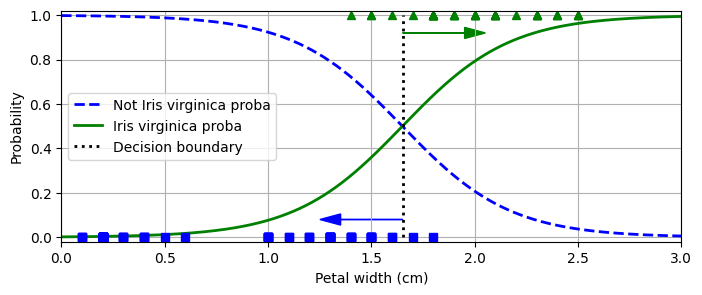

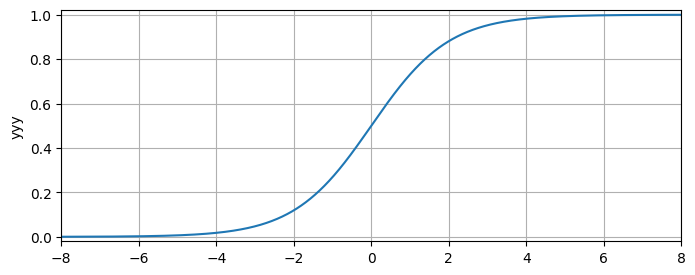

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,label="Decision boundary")
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0, head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

def sigmoid(x):
  return 1/(1+np.exp(-x))

xxx=np.arange(-8,8,0.01)
yyy=sigmoid(xxx)
plt.figure(figsize=(8, 3))
plt.plot(xxx,yyy)
plt.axis([-8, 8, -0.02, 1.02])
plt.ylabel("yyy")
plt.grid()
plt.show()



In [ ]:
decision_boundary

1.6516516516516517

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

(-8.0, 8.0, -0.02, 1.02)

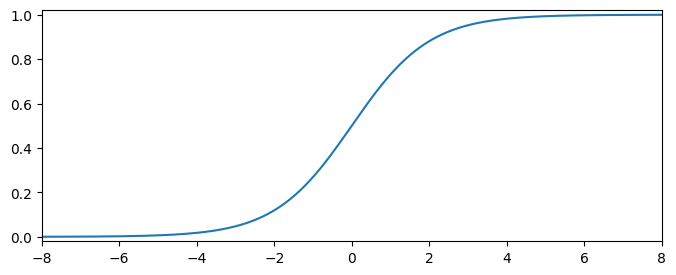

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

xxx=np.arange(-8,8,0.01)
yyy=sigmoid(xxx)
plt.figure(figsize=(8, 3))
plt.plot(xxx,yyy)
plt.axis([-8, 8, -0.02, 1.02])


## Petal Length와 Petal Width를 이용한 예측

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)
# 등고선 그래프
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()] # 그림의 포인트당 하나의 샘플
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)
# 결정 경계
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             /log_reg.coef_[0, 1])


경계면이 평면으로 이루어짐

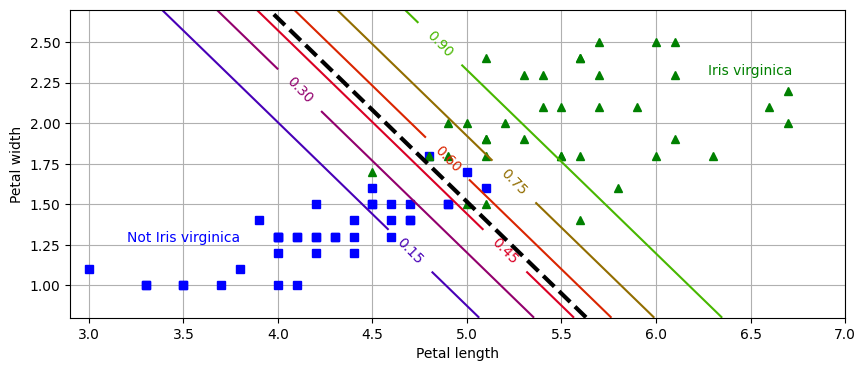

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()


# 소프트맥스 회귀

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

In [ ]:
np.argmax(softmax_reg.predict_proba([[5, 2]]))

2

In [ ]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

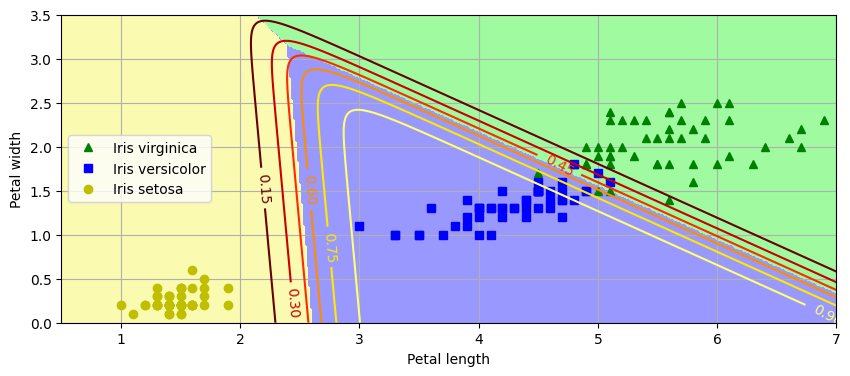

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

iris = load_iris()
X = iris.data[:, 2:]  # "petal length (cm)"와 "petal width (cm)"만 선택
y = iris.target


# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 타겟 원-핫 인코딩
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0,

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

# 데이터셋 불러오기
iris = load_iris()
X = iris.data[:, 2:]  # "petal length (cm)"와 "petal width (cm)"만 선택
y = iris.target

# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 타겟 원-핫 인코딩
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 클래스가 3개이므로 출력 노드는 3개
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=2)

# 모델 평가
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test accuracy: {accuracy:.2f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


14/14 - 1s - 97ms/step - accuracy: 0.3750 - loss: 1.2462
Epoch 2/100
14/14 - 0s - 4ms/step - accuracy: 0.6161 - loss: 1.1912
Epoch 3/100
14/14 - 0s - 4ms/step - accuracy: 0.4018 - loss: 1.1480
Epoch 4/100
14/14 - 0s - 4ms/step - accuracy: 0.3393 - loss: 1.1137
Epoch 5/100
14/14 - 0s - 4ms/step - accuracy: 0.3393 - loss: 1.0850
Epoch 6/100
14/14 - 0s - 4ms/step - accuracy: 0.3393 - loss: 1.0626
Epoch 7/100
14/14 - 0s - 4ms/step - accuracy: 0.3393 - loss: 1.0434
Epoch 8/100
14/14 - 0s - 4ms/step - accuracy: 0.3393 - loss: 1.0247
Epoch 9/100
14/14 - 0s - 3ms/step - accuracy: 0.3571 - loss: 1.0087
Epoch 10/100
14/14 - 0s - 4ms/step - accuracy: 0.3839 - loss: 0.9915
Epoch 11/100
14/14 - 0s - 4ms/step - accuracy: 0.3571 - loss: 0.9793
Epoch 12/100
14/14 - 0s - 3ms/step - accuracy: 0.3393 - loss: 0.9659
Epoch 13/100
14/14 - 0s - 4ms/step - accuracy: 0.3393 - loss: 0.9533
Epoch 14/100
14/14 - 0s - 4ms/step - accuracy: 0.3393 - loss: 0.9407
Epoch 15/100
14/14 - 0s - 5ms/step - accuracy: 0.3393 

In [ ]:
# 모델 평가
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [ ]:
y_test_classes =np.argmax(y_test, axis=1)

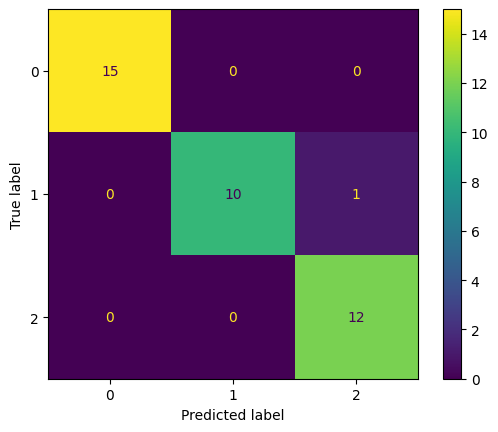

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()